In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv(r"/content/Titanic_Dataset/train.csv")
df_test = pd.read_csv(r"/content/Titanic_Dataset/test.csv")

In [3]:
df_train.shape

(891, 12)

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_test.shape

(418, 11)

In [6]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
print(df_train.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [8]:
target_train = df_train['Survived']
target_train #y_train

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [9]:
target_train.isna().sum() #Missing Values

0

In [10]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [11]:
df_train.isna().sum() #Cabin has almost 85% missing values so we are dropping it

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [12]:
input_train = df_train.drop(['PassengerId','Survived','Name','Ticket','Cabin','Embarked'],axis=1)
input_train.head() #x_train

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [13]:
input_train.Sex.value_counts()

,count
Sex,
male,577
female,314


In [14]:
gender = pd.get_dummies(input_train['Sex'])
gender

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [15]:
input_train_2 = pd.concat([input_train,gender],axis=1)
input_train_2

,Pclass,Sex,Age,SibSp,Parch,Fare,female,male
0,3,male,22.0,1,0,7.2500,False,True
1,1,female,38.0,1,0,71.2833,True,False
2,3,female,26.0,0,0,7.9250,True,False
3,1,female,35.0,1,0,53.1000,True,False
4,3,male,35.0,0,0,8.0500,False,True
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,False,True
887,1,female,19.0,0,0,30.0000,True,False
888,3,female,NaN,1,2,23.4500,True,False
889,1,male,26.0,0,0,30.0000,False,True


In [16]:
input_train_3= input_train_2.drop(['Sex'],axis=1)
input_train_3 #final x_train

,Pclass,Age,SibSp,Parch,Fare,female,male
0,3,22.0,1,0,7.2500,False,True
1,1,38.0,1,0,71.2833,True,False
2,3,26.0,0,0,7.9250,True,False
3,1,35.0,1,0,53.1000,True,False
4,3,35.0,0,0,8.0500,False,True
...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,False,True
887,1,19.0,0,0,30.0000,True,False
888,3,NaN,1,2,23.4500,True,False
889,1,26.0,0,0,30.0000,False,True


In [17]:
input_train_3.isna().sum()

,0
Pclass,0
Age,177
SibSp,0
Parch,0
Fare,0
female,0
male,0


In [18]:
input_train_4 = input_train_3.fillna(input_train_3.Age.mean())

In [19]:
input_train_4.isna().sum() #x_train

,0
Pclass,0
Age,0
SibSp,0
Parch,0
Fare,0
female,0
male,0


In [20]:
input_train_4

,Pclass,Age,SibSp,Parch,Fare,female,male
0,3,22.000000,1,0,7.2500,False,True
1,1,38.000000,1,0,71.2833,True,False
2,3,26.000000,0,0,7.9250,True,False
3,1,35.000000,1,0,53.1000,True,False
4,3,35.000000,0,0,8.0500,False,True
...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,False,True
887,1,19.000000,0,0,30.0000,True,False
888,3,29.699118,1,2,23.4500,True,False
889,1,26.000000,0,0,30.0000,False,True


In [21]:
input_test = df_test.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],axis=1)
input_test

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,34.5,0,0,7.8292
1,3,female,47.0,1,0,7.0000
2,2,male,62.0,0,0,9.6875
3,3,male,27.0,0,0,8.6625
4,3,female,22.0,1,1,12.2875
...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500
414,1,female,39.0,0,0,108.9000
415,3,male,38.5,0,0,7.2500
416,3,male,NaN,0,0,8.0500


In [22]:
gender_test = pd.get_dummies(input_test['Sex'])

In [23]:
input_test_2 = pd.concat([input_test,gender_test],axis=1)
input_test_3= input_test_2.drop(['Sex'],axis=1)
input_test_3

,Pclass,Age,SibSp,Parch,Fare,female,male
0,3,34.5,0,0,7.8292,False,True
1,3,47.0,1,0,7.0000,True,False
2,2,62.0,0,0,9.6875,False,True
3,3,27.0,0,0,8.6625,False,True
4,3,22.0,1,1,12.2875,True,False
...,...,...,...,...,...,...,...
413,3,NaN,0,0,8.0500,False,True
414,1,39.0,0,0,108.9000,True,False
415,3,38.5,0,0,7.2500,False,True
416,3,NaN,0,0,8.0500,False,True


In [24]:
input_test_3.isna().sum()

,0
Pclass,0
Age,86
SibSp,0
Parch,0
Fare,1
female,0
male,0


In [25]:
input_test_4 = input_test_3.fillna(input_test_3.Age.mean())

In [26]:
input_test_4.isna().sum() #x_test

,0
Pclass,0
Age,0
SibSp,0
Parch,0
Fare,0
female,0
male,0


In [27]:
input_test_4.iloc[8]

,8
Pclass,3
Age,18.0
SibSp,0
Parch,0
Fare,7.2292
female,True
male,False


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_mat = input_train_4.corr()
corr_mat

,Pclass,Age,SibSp,Parch,Fare,female,male
Pclass,1.000000,-0.331339,0.083081,0.018443,-0.549500,-0.131900,0.131900
Age,-0.331339,1.000000,-0.232625,-0.179191,0.091566,-0.084153,0.084153
SibSp,0.083081,-0.232625,1.000000,0.414838,0.159651,0.114631,-0.114631
Parch,0.018443,-0.179191,0.414838,1.000000,0.216225,0.245489,-0.245489
Fare,-0.549500,0.091566,0.159651,0.216225,1.000000,0.182333,-0.182333
female,-0.131900,-0.084153,0.114631,0.245489,0.182333,1.000000,-1.000000
male,0.131900,0.084153,-0.114631,-0.245489,-0.182333,-1.000000,1.000000


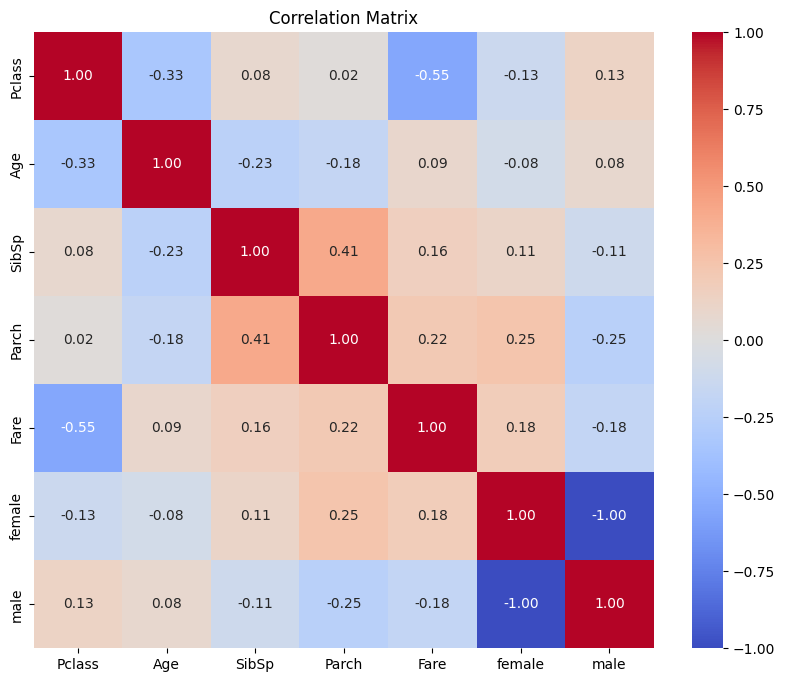

In [33]:
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [46]:
# Drop 'Female' and 'Fare' from the training data (input_train_4)
input_train_5 = input_train_4.drop(['female', 'Fare'], axis=1)

# Drop 'Female' and 'Fare' from the test data (input_test_4)
input_test_5 = input_test_4.drop(['female', 'Fare'], axis=1)

input_train_5

,Pclass,Age,SibSp,Parch,male
0,3,22.000000,1,0,True
1,1,38.000000,1,0,False
2,3,26.000000,0,0,False
3,1,35.000000,1,0,False
4,3,35.000000,0,0,True
...,...,...,...,...,...
886,2,27.000000,0,0,True
887,1,19.000000,0,0,False
888,3,29.699118,1,2,False
889,1,26.000000,0,0,True


In [50]:
from sklearn.preprocessing import LabelEncoder
male_encoder = LabelEncoder()
input_train_5['male'] = male_encoder.fit_transform(input_train_5['male'])

input_test_5['male'] = male_encoder.transform(input_test_5['male'])
input_train_5

,Pclass,Age,SibSp,Parch,male
0,3,22.000000,1,0,1
1,1,38.000000,1,0,0
2,3,26.000000,0,0,0
3,1,35.000000,1,0,0
4,3,35.000000,0,0,1
...,...,...,...,...,...
886,2,27.000000,0,0,1
887,1,19.000000,0,0,0
888,3,29.699118,1,2,0
889,1,26.000000,0,0,1


In [51]:
from sklearn.linear_model import LogisticRegression
c  = LogisticRegression(random_state=0)
c.fit(input_train_5,target_train)#c.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [88]:
from sklearn.linear_model import LogisticRegression

# Create a LogisticRegression object with adjusted parameters
c = LogisticRegression(random_state=0, penalty='l2', C=1.0, solver='liblinear')
c.fit(input_train_5, target_train)

LogisticRegression(random_state=0, solver='liblinear')

In [89]:
y_pred = c.predict(input_test_5)#c.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [90]:
y_test = pd.read_csv(r"/content/Titanic_Dataset/gender_submission.csv")
y_test_2= y_test.drop(['PassengerId'],axis=1)

In [91]:
y_test_2 #y_test

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [92]:
c.score(input_test_5,y_test_2) #x_test, y_test

0.9712918660287081

In [93]:
y_test_2[399:418]

,Survived
399,0
400,1
401,0
402,1
403,0
404,0
405,0
406,0
407,0
408,1


In [94]:
c.predict(input_test_5[399:418])

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0])

In [95]:
c.predict_proba(input_test_5[399:418])

array([[0.88911287, 0.11088713],
       [0.08459423, 0.91540577],
       [0.83069359, 0.16930641],
       [0.07096987, 0.92903013],
       [0.43821646, 0.56178354],
       [0.68285931, 0.31714069],
       [0.69058106, 0.30941894],
       [0.76201135, 0.23798865],
       [0.73172092, 0.26827908],
       [0.39126727, 0.60873273],
       [0.28797908, 0.71202092],
       [0.39126727, 0.60873273],
       [0.12934264, 0.87065736],
       [0.37597845, 0.62402155],
       [0.88705575, 0.11294425],
       [0.10665115, 0.89334885],
       [0.90847187, 0.09152813],
       [0.88705575, 0.11294425],
       [0.91480757, 0.08519243]])

In [96]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_2, y_pred)

print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[261   5]
 [  7 145]]


In [98]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test_2, y_pred))

Accuracy :  0.9712918660287081
